In [1]:
cd C:\Users\dhant\OneDrive\Desktop\simplilearn\DS with python\project_1

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as p
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [123]:
raw_data=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
raw_data.head(3)

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip       Incident Address  ...  \
0  Street/Sidewalk       10034.0    71 VERMILYEA AVENUE  ...   
1  Street/Sidewalk       11105.0        27-07 23 AVENUE  ...   
2  Street/Sidewalk       10458.0  2897 VALENTINE AVENUE  ...   

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
1                 NaN                      NaN       NaN   
2                 NaN                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
1                    NaN             NaN             NaN                 NaN   
2                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                  Location  
0  40.865682 -73.923501   (40.86568153633767, -73.92350095571744)  
1  40.775945 -73.915094  (40.775945312321085, -73.91509393898605)  
2  40.870325 -73.888525  (40.870324522111424, -73.88852464418646)  

[3 rows x 53 columns]

# 1. Understand the dataset:

#### a.	Identify the shape of the dataset

In [4]:
raw_data.shape

(300698, 53)

#### b.	Identify the size of the dataset

In [5]:
raw_data.size

15936994

#### c.	Identify the columns of the dataset

In [6]:
raw_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

#### d.	Identify the data types of the dataset

In [7]:
raw_data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

#### e.	Identify the information of the dataset

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

### f. identifying the number of unique values of dataset

In [10]:
raw_data.nunique()

Unique Key                        300698
Created Date                      259493
Closed Date                       237165
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  107652
Street Name                         7320
Cross Street 1                      5982
Cross Street 2                      5823
Intersection Street 1               4413
Intersection Street 2               4172
Address Type                           5
City                                  53
Landmark                             116
Facility Type                          1
Status                                 4
Due Date                          259851
Resolution Description                18
Resolution Action Updated Date    237895
Community Board                       75
Borough         

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64


<AxesSubplot:xlabel='Status', ylabel='count'>

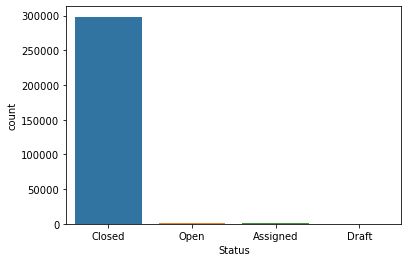

In [236]:
print(raw_data['Status'].value_counts())
sns.countplot('Status',data=raw_data)

# 2. Perform basic data exploratory analysis:

### a. identifying the counting level of  dataset

In [11]:
raw_data.describe().style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

In [12]:
raw_data.describe(include=object)

Created Date    Closed Date  Agency  \
count           300698         298534  300698   
unique          259493         237165       1   
top     07-11-15 23:04  11-08-15 7:34    NYPD   
freq                 9             24  300698   

                            Agency Name    Complaint Type        Descriptor  \
count                            300698            300698            294784   
unique                                3                24                45   
top     New York City Police Department  Blocked Driveway  Loud Music/Party   
freq                             300690             77044             61430   

          Location Type   Incident Address Street Name Cross Street 1  ...  \
count            300567             256288      256288         251419  ...   
unique               18             107652        7320           5982  ...   
top     Street/Sidewalk  1207 BEACH AVENUE    BROADWAY       BROADWAY  ...   
freq             249299                904        3237           4338  ...   

       School State   School Zip School Not Found Bridge Highway Name  \
count        300698       300697           300698                 243   
unique            2            1                1                  29   
top     Unspecified  Unspecified                N              FDR Dr   
freq         300697       300697           300698                  33   

       Bridge Highway Direction Road Ramp  \
count                       243       213   
unique                       34         2   
top           East/Queens Bound   Roadway   
freq                         21       162   

                                  Bridge Highway Segment  Ferry Direction  \
count                                                213                1   
unique                                               160                1   
top     East 96th St (Exit 14) - Triborough Br (Exit 17)  Manhattan Bound   
freq                                                   6                1   

                        Ferry Terminal Name  \
count                                     2   
unique                                    2   
top     St. George Terminal (Staten Island)   
freq                                      1   

                                       Location  
count                                    297158  
unique                                   126048  
top     (40.83036235589997, -73.86602154214397)  
freq                                        902  

[4 rows x 42 columns]

### b. Identifying the total profile report of dataset

In [13]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
pp.ProfileReport(raw_data)

### C.	Generate a separate dataset for numerical and categorical variables

In [15]:
numeric_df = raw_data.select_dtypes(include=[np.number])
numeric_df_columns = numeric_df.columns
print(numeric_df_columns)
numeric_df.head(3)

Index(['Unique Key', 'Incident Zip', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Garage Lot Name', 'Latitude', 'Longitude'],
      dtype='object')


Unique Key  Incident Zip  X Coordinate (State Plane)  \
0    32310363       10034.0                   1005409.0   
1    32309934       11105.0                   1007766.0   
2    32309159       10458.0                   1015081.0   

   Y Coordinate (State Plane)  School or Citywide Complaint  Vehicle Type  \
0                    254678.0                           NaN           NaN   
1                    221986.0                           NaN           NaN   
2                    256380.0                           NaN           NaN   

   Taxi Company Borough  Taxi Pick Up Location  Garage Lot Name   Latitude  \
0                   NaN                    NaN              NaN  40.865682   
1                   NaN                    NaN              NaN  40.775945   
2                   NaN                    NaN              NaN  40.870325   

   Longitude  
0 -73.923501  
1 -73.915094  
2 -73.888525

In [17]:
categorical_df = raw_data.select_dtypes(exclude=[np.number])
categorical_df_columns = categorical_df.columns
print(categorical_df.columns)
categorical_df.head(3)

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Ferry Direction', 'Ferry Terminal Name', 'Location'],
      dtype='object')


Created Date    Closed Date Agency  \
0  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type       Incident Address       Street Name   Cross Street 1  \
0  Street/Sidewalk    71 VERMILYEA AVENUE  VERMILYEA AVENUE   ACADEMY STREET   
1  Street/Sidewalk        27-07 23 AVENUE         23 AVENUE        27 STREET   
2  Street/Sidewalk  2897 VALENTINE AVENUE  VALENTINE AVENUE  EAST 198 STREET   

   ... School State   School Zip School Not Found Bridge Highway Name  \
0  ...  Unspecified  Unspecified                N                 NaN   
1  ...  Unspecified  Unspecified                N                 NaN   
2  ...  Unspecified  Unspecified                N                 NaN   

  Bridge Highway Direction Road Ramp Bridge Highway Segment Ferry Direction  \
0                      NaN       NaN                    NaN             NaN   
1                      NaN       NaN                    NaN             NaN   
2                      NaN       NaN                    NaN             NaN   

  Ferry Terminal Name                                  Location  
0                 NaN   (40.86568153633767, -73.92350095571744)  
1                 NaN  (40.775945312321085, -73.91509393898605)  
2                 NaN  (40.870324522111424, -73.88852464418646)  

[3 rows x 42 columns]

#### a. Utilize missing value treatment

In [18]:
df_nulls = pd.DataFrame(raw_data.isna().sum(),columns=['Nulls'])
df_nulls = df_nulls[df_nulls.Nulls != 0]
df_nulls

Nulls
Closed Date                       2164
Descriptor                        5914
Location Type                      131
Incident Zip                      2615
Incident Address                 44410
Street Name                      44410
Cross Street 1                   49279
Cross Street 2                   49779
Intersection Street 1           256840
Intersection Street 2           257336
Address Type                      2815
City                              2614
Landmark                        300349
Facility Type                     2171
Due Date                             3
Resolution Action Updated Date    2187
X Coordinate (State Plane)        3540
Y Coordinate (State Plane)        3540
School Region                        1
School Code                          1
School Zip                           1
School or Citywide Complaint    300698
Vehicle Type                    300698
Taxi Company Borough            300698
Taxi Pick Up Location           300698
Bridge Highway Name             300455
Bridge Highway Direction        300455
Road Ramp                       300485
Bridge Highway Segment          300485
Garage Lot Name                 300698
Ferry Direction                 300697
Ferry Terminal Name             300696
Latitude                          3540
Longitude                         3540
Location                          3540

In [22]:
raw_data[raw_data.isna() == True]

Unique Key Created Date Closed Date Agency Agency Name Complaint Type  \
0              NaN          NaN         NaN    NaN         NaN            NaN   
1              NaN          NaN         NaN    NaN         NaN            NaN   
2              NaN          NaN         NaN    NaN         NaN            NaN   
3              NaN          NaN         NaN    NaN         NaN            NaN   
4              NaN          NaN         NaN    NaN         NaN            NaN   
...            ...          ...         ...    ...         ...            ...   
300693         NaN          NaN         NaN    NaN         NaN            NaN   
300694         NaN          NaN         NaN    NaN         NaN            NaN   
300695         NaN          NaN         NaN    NaN         NaN            NaN   
300696         NaN          NaN         NaN    NaN         NaN            NaN   
300697         NaN          NaN         NaN    NaN         NaN            NaN   

       Descriptor Location Type  Incident Zip Incident Address  ...  \
0             NaN           NaN           NaN              NaN  ...   
1             NaN           NaN           NaN              NaN  ...   
2             NaN           NaN           NaN              NaN  ...   
3             NaN           NaN           NaN              NaN  ...   
4             NaN           NaN           NaN              NaN  ...   
...           ...           ...           ...              ...  ...   
300693        NaN           NaN           NaN              NaN  ...   
300694        NaN           NaN           NaN              NaN  ...   
300695        NaN           NaN           NaN              NaN  ...   
300696        NaN           NaN           NaN              NaN  ...   
300697        NaN           NaN           NaN              NaN  ...   

       Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                      NaN                      NaN       NaN   
1                      NaN                      NaN       NaN   
2                      NaN                      NaN       NaN   
3                      NaN                      NaN       NaN   
4                      NaN                      NaN       NaN   
...                    ...                      ...       ...   
300693                 NaN                      NaN       NaN   
300694                 NaN                      NaN       NaN   
300695                 NaN                      NaN       NaN   
300696                 NaN                      NaN       NaN   
300697                 NaN                      NaN       NaN   

       Bridge Highway Segment Garage Lot Name Ferry Direction  \
0                         NaN             NaN             NaN   
1                         NaN             NaN             NaN   
2                         NaN             NaN             NaN   
3                         NaN             NaN             NaN   
4                         NaN             NaN             NaN   
...                       ...             ...             ...   
300693                    NaN             NaN             NaN   
300694                    NaN             NaN             NaN   
300695                    NaN             NaN             NaN   
300696                    NaN             NaN             NaN   
300697                    NaN             NaN             NaN   

       Ferry Terminal Name Latitude Longitude Location  
0                      NaN      NaN       NaN      NaN  
1                      NaN      NaN       NaN      NaN  
2                      NaN      NaN       NaN      NaN  
3                      NaN      NaN       NaN      NaN  
4                      NaN      NaN       NaN      NaN  
...                    ...      ...       ...      ...  
300693                 NaN      NaN       NaN      NaN  
300694                 NaN      NaN       NaN      NaN  
300695                 NaN      NaN       NaN      NaN  
300696                 NaN      NaN       NaN     

In [23]:
(raw_data.isna().sum()/raw_data.shape[0])*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

### Observation 

by observing the columns of the dataset most of the columns having 85% of missing data so there is problem to removing 
the columns from the dataset...

In [124]:
raw_data.drop(columns=['Intersection Street 1','Intersection Street 2','Landmark','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Road Ramp','Bridge Highway Segment'],axis=1,inplace=True)
raw_data.head(3)

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip       Incident Address  ...  School Code  \
0  Street/Sidewalk       10034.0    71 VERMILYEA AVENUE  ...  Unspecified   
1  Street/Sidewalk       11105.0        27-07 23 AVENUE  ...  Unspecified   
2  Street/Sidewalk       10458.0  2897 VALENTINE AVENUE  ...  Unspecified   

  School Phone Number School Address  School City School State   School Zip  \
0         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
1         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
2         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   

  School Not Found   Latitude  Longitude  \
0                N  40.865682 -73.923501   
1                N  40.775945 -73.915094   
2                N  40.870325 -73.888525   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  

[3 rows x 39 columns]

In [5]:
raw_data.shape

(300698, 39)

In [14]:
raw_data.size

11727222

In [34]:
nulls = pd.DataFrame(raw_data.isna().sum(),columns=['Nulls'])
nulls = nulls[nulls.Nulls != 0]
nulls

Nulls
Closed Date                      2164
Descriptor                       5914
Location Type                     131
Incident Zip                     2615
Incident Address                44410
Street Name                     44410
Cross Street 1                  49279
Cross Street 2                  49779
Address Type                     2815
City                             2614
Facility Type                    2171
Due Date                            3
Resolution Action Updated Date   2187
X Coordinate (State Plane)       3540
Y Coordinate (State Plane)       3540
School Region                       1
School Code                         1
School Zip                          1
Latitude                         3540
Longitude                        3540
Location                         3540

In [36]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [125]:
raw_data['Closed Date'].fillna(raw_data['Closed Date'].mode()[0],inplace=True)
raw_data['Descriptor'].fillna(raw_data['Descriptor'].mode()[0],inplace = True)
raw_data['Incident Address'].fillna(raw_data['Incident Address'].mode()[0],inplace = True)
raw_data['Location Type'].fillna(raw_data['Location Type'].mode()[0],inplace = True)
raw_data['Incident Zip'].fillna(raw_data['Incident Zip'].mean(),inplace = True)
raw_data['Facility Type'].fillna(raw_data['Facility Type'].mode()[0],inplace = True)
raw_data['Due Date'].fillna(raw_data['Due Date'].mode()[0],inplace = True)
raw_data['Street Name'].fillna(raw_data['Street Name'].mode()[0],inplace = True)
raw_data['Cross Street 1'].fillna(raw_data['Cross Street 1'].mode()[0],inplace = True)
raw_data['Cross Street 2'].fillna(raw_data['Cross Street 2'].mode()[0],inplace = True)
raw_data['Address Type'].fillna(raw_data['Address Type'].mode()[0],inplace = True)
raw_data['City'].fillna(raw_data['City'].mode()[0],inplace = True)
raw_data['School Region'].fillna(raw_data['School Region'].mode()[0],inplace = True)
raw_data['School Code'].fillna(raw_data['School Code'].mode()[0],inplace = True)
raw_data['School Zip'].fillna(raw_data['School Zip'].mode()[0],inplace = True)
raw_data['Resolution Action Updated Date'].fillna(raw_data['Resolution Action Updated Date'].mode()[0],inplace = True)
raw_data['X Coordinate (State Plane)'].fillna(raw_data['X Coordinate (State Plane)'].mean(),inplace = True)
raw_data['Y Coordinate (State Plane)'].fillna(raw_data['Y Coordinate (State Plane)'].mean(),inplace = True)
raw_data['Latitude'].fillna(raw_data['Latitude'].mean(),inplace = True)
raw_data['Longitude'].fillna(raw_data['Longitude'].mean(),inplace = True)
raw_data['Location'].fillna(raw_data['Location'].mode()[0],inplace = True)

### after treating the missig values ..we can clearly understand there is no missing values in dataset

In [7]:
raw_data.isna().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number               

### b. Analyze the date column and remove the entries if it has an incorrect timeline

In [69]:
raw_data.head(3)

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip       Incident Address  ...  School Code  \
0  Street/Sidewalk       10034.0    71 VERMILYEA AVENUE  ...  Unspecified   
1  Street/Sidewalk       11105.0        27-07 23 AVENUE  ...  Unspecified   
2  Street/Sidewalk       10458.0  2897 VALENTINE AVENUE  ...  Unspecified   

  School Phone Number School Address  School City School State   School Zip  \
0         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
1         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
2         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   

  School Not Found   Latitude  Longitude  \
0                N  40.865682 -73.923501   
1                N  40.775945 -73.915094   
2                N  40.870325 -73.888525   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  

[3 rows x 39 columns]

In [129]:
raw_data['Created Date'] = pd.to_datetime(raw_data['Created Date'])
raw_data['Closed Date'] = pd.to_datetime(raw_data['Closed Date'])

In [130]:
raw_data.head(10)

Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   
5    32306554 2015-12-31 23:56:30 2016-01-01 01:50:00   NYPD   
6    32306559 2015-12-31 23:55:32 2016-01-01 01:53:00   NYPD   
7    32307009 2015-12-31 23:54:05 2016-01-01 01:42:00   NYPD   
8    32308581 2015-12-31 23:53:58 2016-01-01 08:27:00   NYPD   
9    32308391 2015-12-31 23:53:58 2016-01-01 01:17:00   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   
5  New York City Police Department          Illegal Parking   
6  New York City Police Department          Illegal Parking   
7  New York City Police Department         Blocked Driveway   
8  New York City Police Department          Illegal Parking   
9  New York City Police Department         Blocked Driveway   

                      Descriptor    Location Type  Incident Zip  \
0               Loud Music/Party  Street/Sidewalk       10034.0   
1                      No Access  Street/Sidewalk       11105.0   
2                      No Access  Street/Sidewalk       10458.0   
3   Commercial Overnight Parking  Street/Sidewalk       10461.0   
4               Blocked Sidewalk  Street/Sidewalk       11373.0   
5  Posted Parking Sign Violation  Street/Sidewalk       11215.0   
6                Blocked Hydrant  Street/Sidewalk       10032.0   
7                      No Access  Street/Sidewalk       10457.0   
8  Posted Parking Sign Violation  Street/Sidewalk       11415.0   
9                      No Access  Street/Sidewalk       11219.0   

           Incident Address  ...  School Code School Phone Number  \
0       71 VERMILYEA AVENUE  ...  Unspecified         Unspecified   
1           27-07 23 AVENUE  ...  Unspecified         Unspecified   
2     2897 VALENTINE AVENUE  ...  Unspecified         Unspecified   
3       2940 BAISLEY AVENUE  ...  Unspecified         Unspecified   
4             87-14 57 ROAD  ...  Unspecified         Unspecified   
5             260 21 STREET  ...  Unspecified         Unspecified   
6       524 WEST 169 STREET  ...  Unspecified         Unspecified   
7       501 EAST 171 STREET  ...  Unspecified         Unspecified   
8  83-44 LEFFERTS BOULEVARD  ...  Unspecified         Unspecified   
9            1408 66 STREET  ...  Unspecified         Unspecified   

  School Address  School City School State   School Zip School Not Found  \
0    Unspecified  Unspecified  Unspecified  Unspecified                N   
1    Unspecified  Unspecified  Unspecified  Unspecified                N   
2    Unspecified  Unspecified  Unspecified  Unspecified                N   
3    Unspecified  Unspecified  Unspecified  Unspecified                N   
4    Unspecified  Unspecified  Unspecified  Unspecified                N   
5    Unspecified  Unspecified  Unspecified  Unspecified                N   
6    Unspecified  Unspecified  Unspecified  Unspecified                N   
7    Unspecified  Unspecified  Unspecified  Unspecified                N   
8    Unspecified  Unspecified  Unspecified  Unspecified                N   
9    Unspecified  Unspecified  Unspecified  Unspecified                N   

    Latitude  Longitude                                  Location  
0  40.865682 -73.923501   (40.86568153633767, -73.92350095571744)  
1  40.775945 -73.915094  (40.775945312321085, -73.91509393898605)  
2  40.870325 -73.888525  (40.870324522111424, -73.88852464418646)

In [131]:
raw_data['Complaint_timeperiod'] = raw_data['Closed Date'] - raw_data['Created Date']

In [132]:
raw_data.head(3)

Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip       Incident Address  ...  \
0  Street/Sidewalk       10034.0    71 VERMILYEA AVENUE  ...   
1  Street/Sidewalk       11105.0        27-07 23 AVENUE  ...   
2  Street/Sidewalk       10458.0  2897 VALENTINE AVENUE  ...   

  School Phone Number School Address  School City School State   School Zip  \
0         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
1         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
2         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   

  School Not Found   Latitude  Longitude  \
0                N  40.865682 -73.923501   
1                N  40.775945 -73.915094   
2                N  40.870325 -73.888525   

                                   Location Complaint_timeperiod  
0   (40.86568153633767, -73.92350095571744)      0 days 00:55:15  
1  (40.775945312321085, -73.91509393898605)      0 days 01:26:16  
2  (40.870324522111424, -73.88852464418646)      0 days 04:51:31  

[3 rows x 40 columns]

In [133]:
first_column = raw_data.pop('Complaint_timeperiod')
  
# insert column using insert(position,column_name,
# first_column) function
raw_data.insert(3, 'Complaint_timeperiod', first_column)
raw_data.head(3)

Unique Key        Created Date         Closed Date Complaint_timeperiod  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00      0 days 00:55:15   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00      0 days 01:26:16   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00      0 days 04:51:31   

  Agency                      Agency Name           Complaint Type  \
0   NYPD  New York City Police Department  Noise - Street/Sidewalk   
1   NYPD  New York City Police Department         Blocked Driveway   
2   NYPD  New York City Police Department         Blocked Driveway   

         Descriptor    Location Type  Incident Zip  ...  School Code  \
0  Loud Music/Party  Street/Sidewalk       10034.0  ...  Unspecified   
1         No Access  Street/Sidewalk       11105.0  ...  Unspecified   
2         No Access  Street/Sidewalk       10458.0  ...  Unspecified   

  School Phone Number School Address  School City School State   School Zip  \
0         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
1         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
2         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   

  School Not Found   Latitude  Longitude  \
0                N  40.865682 -73.923501   
1                N  40.775945 -73.915094   
2                N  40.870325 -73.888525   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  

[3 rows x 40 columns]

### C.Draw a frequency plot for city-wise complaints

In [134]:
raw_data['City'].value_counts() #generate counts

BROOKLYN               100921
NEW YORK                65994
BRONX                   40702
STATEN ISLAND           12343
JAMAICA                  7296
ASTORIA                  6330
FLUSHING                 5971
RIDGEWOOD                5163
CORONA                   4295
WOODSIDE                 3544
SOUTH RICHMOND HILL      2774
OZONE PARK               2755
EAST ELMHURST            2734
ELMHURST                 2673
WOODHAVEN                2464
MASPETH                  2462
LONG ISLAND CITY         2437
SOUTH OZONE PARK         2173
RICHMOND HILL            1904
FRESH MEADOWS            1899
QUEENS VILLAGE           1814
MIDDLE VILLAGE           1765
JACKSON HEIGHTS          1689
FOREST HILLS             1688
REGO PARK                1486
BAYSIDE                  1221
COLLEGE POINT            1220
FAR ROCKAWAY             1179
WHITESTONE               1098
HOLLIS                   1012
HOWARD BEACH              931
ROSEDALE                  922
SPRINGFIELD GARDENS       883
SAINT ALBA

<AxesSubplot:>

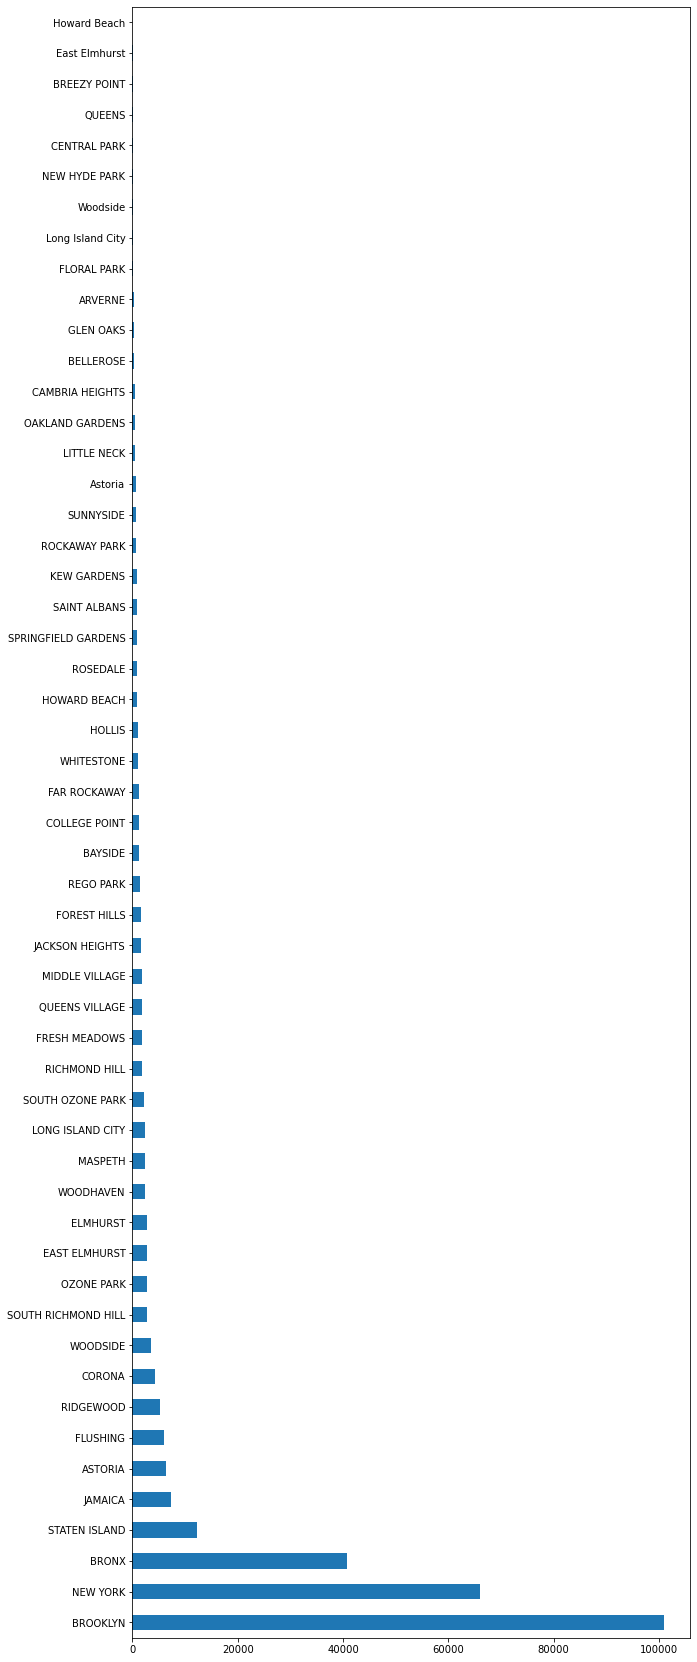

In [135]:
raw_data['City'].value_counts().plot(kind='barh', figsize=(10,30))

### d.Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [136]:
raw_data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [137]:
numeric_df = raw_data.select_dtypes(include=[np.number])
numeric_df_columns = numeric_df.columns
numeric_df_columns

Index(['Unique Key', 'Complaint_timeperiod', 'Incident Zip',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude',
       'Longitude'],
      dtype='object')

In [138]:
numeric_df.head()

Unique Key Complaint_timeperiod  Incident Zip  X Coordinate (State Plane)  \
0    32310363      0 days 00:55:15       10034.0                   1005409.0   
1    32309934      0 days 01:26:16       11105.0                   1007766.0   
2    32309159      0 days 04:51:31       10458.0                   1015081.0   
3    32305098      0 days 07:45:14       10461.0                   1031740.0   
4    32306529      0 days 03:27:02       11373.0                   1019123.0   

   Y Coordinate (State Plane)   Latitude  Longitude  
0                    254678.0  40.865682 -73.923501  
1                    221986.0  40.775945 -73.915094  
2                    256380.0  40.870325 -73.888525  
3                    243899.0  40.835994 -73.828379  
4                    206375.0  40.733060 -73.874170

In [139]:
df_Brooklyn=raw_data[raw_data['City']=='BROOKLYN']
df_Brooklyn.head(3)

Unique Key        Created Date         Closed Date Complaint_timeperiod  \
5     32306554 2015-12-31 23:56:30 2016-01-01 01:50:00      0 days 01:53:30   
9     32308391 2015-12-31 23:53:58 2016-01-01 01:17:00      0 days 01:23:02   
13    32305074 2015-12-31 23:47:58 2016-01-01 08:18:00      0 days 08:30:02   

   Agency                      Agency Name    Complaint Type  \
5    NYPD  New York City Police Department   Illegal Parking   
9    NYPD  New York City Police Department  Blocked Driveway   
13   NYPD  New York City Police Department   Illegal Parking   

                       Descriptor    Location Type  Incident Zip  ...  \
5   Posted Parking Sign Violation  Street/Sidewalk       11215.0  ...   
9                       No Access  Street/Sidewalk       11219.0  ...   
13  Posted Parking Sign Violation  Street/Sidewalk       11208.0  ...   

    School Code School Phone Number School Address  School City School State  \
5   Unspecified         Unspecified    Unspecified  Unspecified  Unspecified   
9   Unspecified         Unspecified    Unspecified  Unspecified  Unspecified   
13  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified   

     School Zip School Not Found   Latitude  Longitude  \
5   Unspecified                N  40.660823 -73.992568   
9   Unspecified                N  40.623793 -73.999539   
13  Unspecified                N  40.687511 -73.874505   

                                    Location  
5    (40.66082272389114, -73.99256786342693)  
9   (40.623793065806524, -73.99953890121567)  
13   (40.68751060232221, -73.87450451131276)  

[3 rows x 40 columns]

In [140]:
df_Brooklyn.shape

(100921, 40)

Illegal Parking              28505
Blocked Driveway             28431
Noise - Street/Sidewalk      13968
Noise - Commercial           11840
Derelict Vehicle              5352
Noise - Vehicle               5231
Animal Abuse                  2405
Noise - Park                  1581
Traffic                       1088
Homeless Encampment            858
Vending                        522
Noise - House of Worship       342
Drinking                       265
Urinating in Public            136
Bike/Roller/Skate Chronic      116
Disorderly Youth                72
Illegal Fireworks               61
Panhandling                     51
Posting Advertisement           46
Graffiti                        43
Agency Issues                    6
Ferry Complaint                  2
Name: Complaint Type, dtype: int64


<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}>

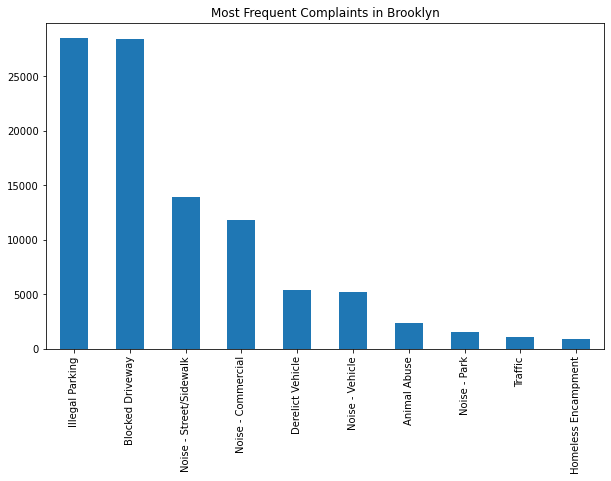

In [141]:
print(df_Brooklyn['Complaint Type'].value_counts())
(df_Brooklyn['Complaint Type'].value_counts()).head(10).plot(kind='bar',figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

<AxesSubplot:title={'center':'Location Type vs # Complaints'}>

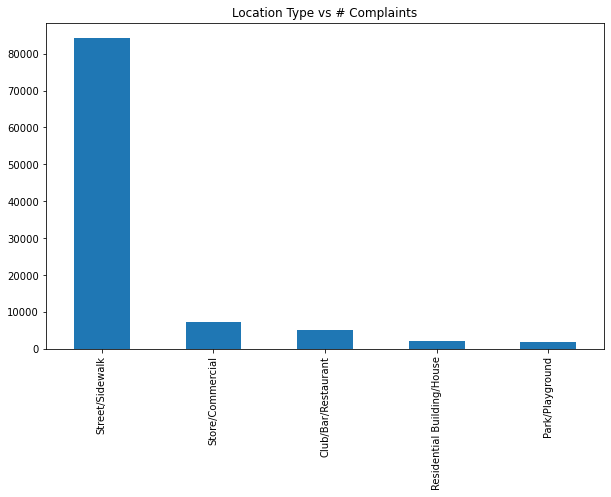

In [142]:
(df_Brooklyn['Location Type'].value_counts()).head().plot(kind='bar',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')

(-74.08561051628611, -73.79949620371389, 40.556961642, 40.877267738)

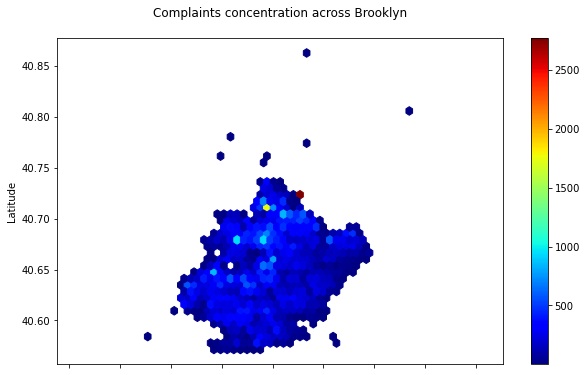

In [143]:
df_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

### Working with the most frequent complaint i.e. Illegal Parking


In [144]:
raw_data[raw_data['Complaint Type'] == 'Illegal Parking']['Descriptor'].value_counts()


Posted Parking Sign Violation     22440
Blocked Hydrant                   16081
Commercial Overnight Parking      12189
Blocked Sidewalk                  11121
Double Parked Blocking Traffic     5731
Double Parked Blocking Vehicle     4211
Overnight Commercial Storage       1757
Unauthorized Bus Layover           1367
Detached Trailer                    464
Name: Descriptor, dtype: int64

In [145]:
df_Brook_illegal = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Illegal Parking']
df_Brook_illegal

Unique Key        Created Date         Closed Date  \
5         32306554 2015-12-31 23:56:30 2016-01-01 01:50:00   
13        32305074 2015-12-31 23:47:58 2016-01-01 08:18:00   
33        32306700 2015-12-31 23:18:10 2016-01-02 01:04:00   
55        32305109 2015-12-31 22:57:52 2016-01-01 03:10:00   
64        32306587 2015-12-31 22:48:38 2015-12-31 22:55:33   
...            ...                 ...                 ...   
300558    30286857 2015-03-29 04:07:30 2015-03-29 07:27:57   
300572    30281737 2015-03-29 03:07:59 2015-03-29 04:37:28   
300594    30280601 2015-03-29 02:26:55 2015-03-29 05:07:43   
300611    30282537 2015-03-29 02:05:28 2015-03-29 02:48:06   
300658    30282085 2015-03-29 01:10:20 2015-03-29 02:32:54   

       Complaint_timeperiod Agency                      Agency Name  \
5           0 days 01:53:30   NYPD  New York City Police Department   
13          0 days 08:30:02   NYPD  New York City Police Department   
33          1 days 01:45:50   NYPD  New York City Police Department   
55          0 days 04:12:08   NYPD  New York City Police Department   
64          0 days 00:06:55   NYPD  New York City Police Department   
...                     ...    ...                              ...   
300558      0 days 03:20:27   NYPD  New York City Police Department   
300572      0 days 01:29:29   NYPD  New York City Police Department   
300594      0 days 02:40:48   NYPD  New York City Police Department   
300611      0 days 00:42:38   NYPD  New York City Police Department   
300658      0 days 01:22:34   NYPD  New York City Police Department   

         Complaint Type                      Descriptor    Location Type  \
5       Illegal Parking   Posted Parking Sign Violation  Street/Sidewalk   
13      Illegal Parking   Posted Parking Sign Violation  Street/Sidewalk   
33      Illegal Parking  Double Parked Blocking Traffic  Street/Sidewalk   
55      Illegal Parking   Posted Parking Sign Violation  Street/Sidewalk   
64      Illegal Parking   Posted Parking Sign Violation  Street/Sidewalk   
...                 ...                             ...              ...   
300558  Illegal Parking                Blocked Sidewalk  Street/Sidewalk   
300572  Illegal Parking                 Blocked Hydrant  Street/Sidewalk   
300594  Illegal Parking                 Blocked Hydrant  Street/Sidewalk   
300611  Illegal Parking                 Blocked Hydrant  Street/Sidewalk   
300658  Illegal Parking   Posted Parking Sign Violation  Street/Sidewalk   

        Incident Zip  ...  School Code School Phone Number School Address  \
5       11215.000000  ...  Unspecified         Unspecified    Unspecified   
13      11208.000000  ...  Unspecified         Unspecified    Unspecified   
33      10848.888645  ...  Unspecified         Unspecified    Unspecified   
55      11209.000000  ...  Unspecified         Unspecified    Unspecified   
64      11209.000000  ...  Unspecified         Unspecified    Unspecified   
...              ...  ...          ...                 ...            ...   
300558  11214.000000  ...  Unspecified         Unspecified    Unspecified   
300572  11234.000000  ...  Unspecified         Unspecified    Unspecified   
300594  11219.000000  ...  Unspecified         Unspecified    Unspecified   
300611  11225.000000  ...  Unspecified         Unspecified    Unspecified   
300658  11236.000000  ...  Unspecified         Unspecified    Unspecified   

        School City School State   School Zip School Not Found   Latitude  \
5       Unspecified  Unspecified  Unspecified                N  40.660823   
13      Unspecified  Unspecified  Unspecified                N  40.687511   
33      Unspecified  Unspecified  Unspecified                N  40.725885   
55      Unspecified  Unspecified  Unspecified                N  40.635259   
64      Unspecified  Unspecified  Unspecified                N  40.636137   
...             ...          ...          ...              ...        ...   
300558  Unspecified  Unspecified 

(-74.05222641725115, -73.80108592274885, 40.556961642, 40.877267738)

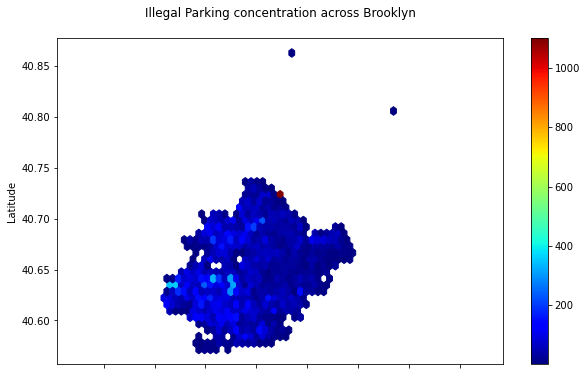

In [146]:
df_Brook_illegal[df_Brook_illegal['Complaint Type'] == 'Illegal Parking'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Illegal Parking concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

# 3. Find major types of complaints:

In [147]:
print(raw_data['Complaint Type'].value_counts())

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64


### a.Plot a bar graph of count vs. complaint types

<AxesSubplot:title={'center':'Count vs # Complaints'}>

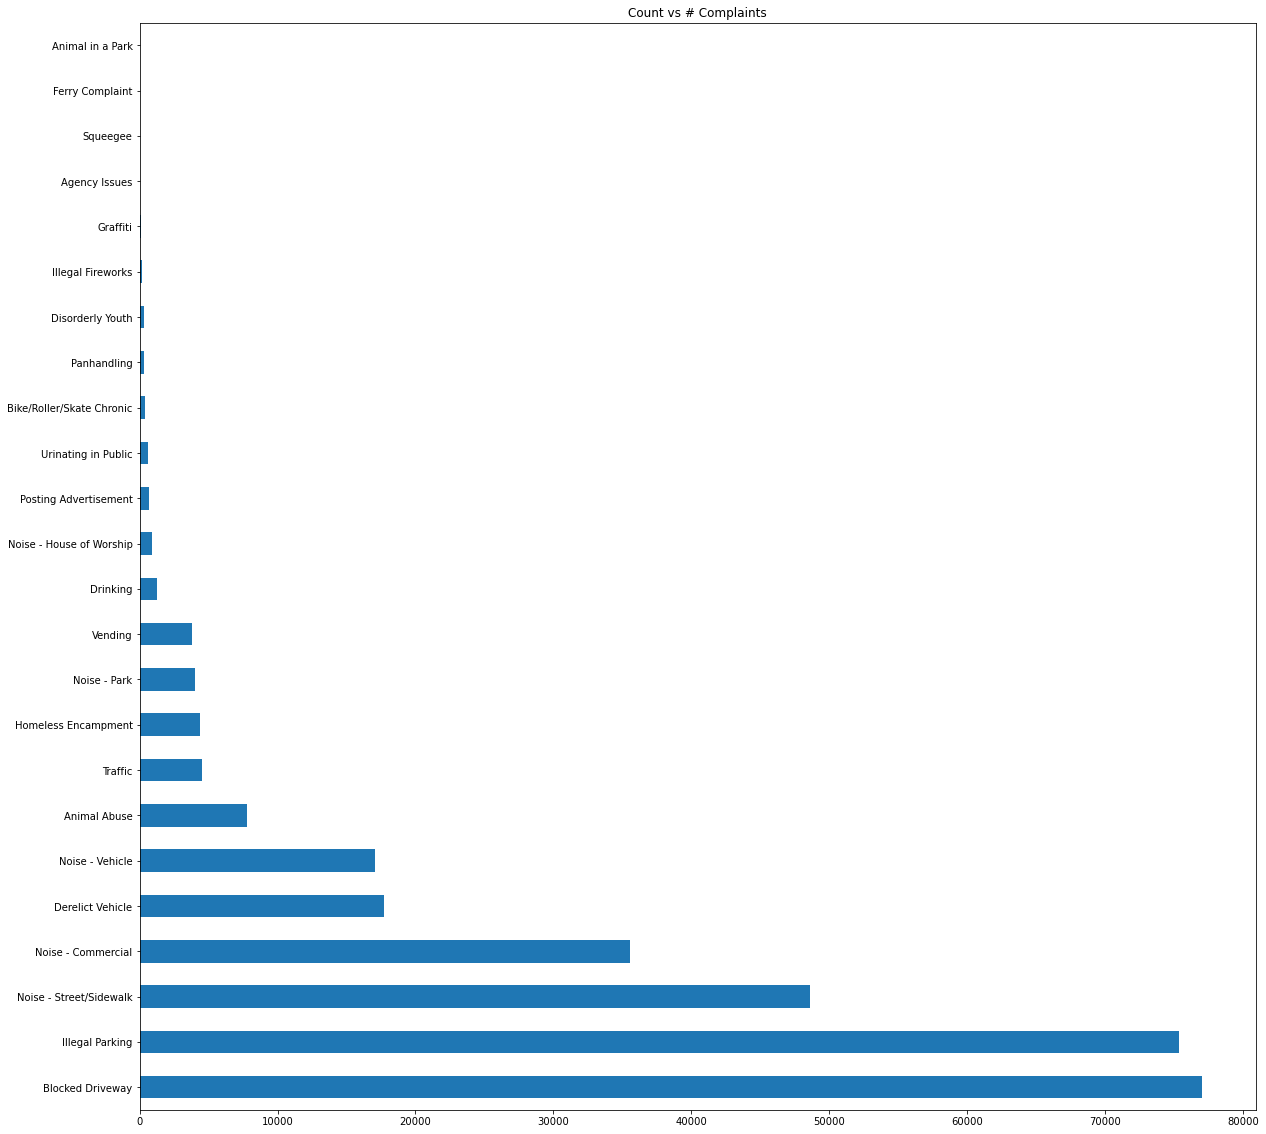

In [148]:
raw_data['Complaint Type'].value_counts().plot(kind='barh', figsize=(20,20),title = 'Count vs # Complaints')

### b.Find the top 10 types of complaints

#from the above we can clearly understand the major types of compliants are
1.Blocked Driveway             77044
I2.llegal Parking              75361
3.Noise - Street/Sidewalk      48612
4.Noise - Commercial           35577
5.Derelict Vehicle             17718
6.Noise - Vehicle              17083
7.Animal Abuse                  7778
8.Traffic                       4498
9.Homeless Encampment           4416
10.Noise - Park                  4042

### c. Display the types of complaints in each city in a separate dataset

In [149]:
city_compliant=pd.DataFrame(raw_data.groupby(['City'])['Complaint Type'].value_counts())
city_compliant.head(30)

Complaint Type
City    Complaint Type                           
ARVERNE Illegal Parking                        58
        Animal Abuse                           38
        Blocked Driveway                       35
        Noise - Street/Sidewalk                29
        Derelict Vehicle                       27
        Noise - House of Worship               11
        Noise - Vehicle                         7
        Homeless Encampment                     4
        Disorderly Youth                        2
        Noise - Commercial                      2
        Noise - Park                            2
        Drinking                                1
        Graffiti                                1
        Panhandling                             1
        Urinating in Public                     1
        Vending                                 1
ASTORIA Blocked Driveway                     2618
        Noise - Commercial                   1293
        Illegal Parking                      1068
        Noise - Street/Sidewalk               386
        Derelict Vehicle                      351
        Noise - Vehicle                       204
        Animal Abuse                          125
        Noise - Park                           61
        Vending                                54
        Traffic                                47
        Drinking                               35
        Homeless Encampment                    32
        Noise - House of Worship               19
        Bike/Roller/Skate Chronic              15

In [150]:
city_compliant.tail(30)

Complaint Type
City      Complaint Type                           
WOODHAVEN Traffic                                 6
          Vending                                 6
          Drinking                                3
          Noise - House of Worship                3
          Noise - Park                            3
          Bike/Roller/Skate Chronic               2
          Urinating in Public                     2
WOODSIDE  Blocked Driveway                     1613
          Illegal Parking                       891
          Noise - Street/Sidewalk               250
          Derelict Vehicle                      247
          Noise - Commercial                    209
          Noise - Vehicle                       105
          Animal Abuse                           69
          Traffic                                39
          Noise - Park                           38
          Homeless Encampment                    33
          Drinking                               15
          Vending                                15
          Urinating in Public                     8
          Bike/Roller/Skate Chronic               4
          Graffiti                                3
          Noise - House of Worship                3
          Disorderly Youth                        1
          Illegal Fireworks                       1
Woodside  Illegal Parking                       100
          Blocked Driveway                       11
          Noise - Street/Sidewalk                 5
          Derelict Vehicle                        2
          Noise - Commercial                      2

# 4. Visualize the major types of complaints in each city

In [151]:
s = pd.DataFrame(raw_data['Complaint Type'].groupby(raw_data['City']).value_counts().astype(int).groupby(level=0, group_keys=False).head(6))
s.head(30)

Complaint Type
City         Complaint Type                          
ARVERNE      Illegal Parking                       58
             Animal Abuse                          38
             Blocked Driveway                      35
             Noise - Street/Sidewalk               29
             Derelict Vehicle                      27
             Noise - House of Worship              11
ASTORIA      Blocked Driveway                    2618
             Noise - Commercial                  1293
             Illegal Parking                     1068
             Noise - Street/Sidewalk              386
             Derelict Vehicle                     351
             Noise - Vehicle                      204
Astoria      Noise - Commercial                   262
             Illegal Parking                      213
             Blocked Driveway                     116
             Noise - Street/Sidewalk              114
             Derelict Vehicle                      12
BAYSIDE      Illegal Parking                      514
             Blocked Driveway                     377
             Derelict Vehicle                     198
             Noise - Commercial                    40
             Animal Abuse                          37
             Noise - Vehicle                       16
BELLEROSE    Illegal Parking                      106
             Blocked Driveway                      95
             Derelict Vehicle                      89
             Noise - Commercial                    37
             Noise - Street/Sidewalk               13
             Noise - Vehicle                       10
BREEZY POINT Illegal Parking                       15

In [175]:
s.rename(columns = {'Complaint Type':'Count'}, inplace = True)
s['Count']=s['Count'].astype(int)
raw_data.rename(columns = {'Complaint Type':'Complaint_Type'}, inplace = True)

<AxesSubplot:xlabel='Count', ylabel='Density'>

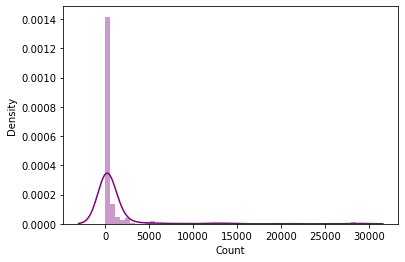

In [179]:
sns.distplot(s['Count'],color='purple')

# 5. Check if the average response time across various types of complaints

In [183]:
RCTime = raw_data[['City','Complaint_Type','Complaint_timeperiod']]
RCTime.dropna(subset = ['City','Complaint_Type','Complaint_timeperiod'], inplace = True)
RCTime['DeltaT(in_hr.)'] = np.around( (RCTime['Complaint_timeperiod'].astype(np.int64)/
                                                      (pow(10,9)*3600) ), decimals=2)
neg_time = RCTime[RCTime['DeltaT(in_hr.)'] < 0].sum()
#data_place_CType_RCTime['DeltaT(in sec)/Avg.'] = np.around((data_place_CType_RCTime['DeltaT(in sec)']/Avarage_time),decimals=1)
RCTime.head(6)

City           Complaint_Type Complaint_timeperiod  DeltaT(in_hr.)
0  NEW YORK  Noise - Street/Sidewalk      0 days 00:55:15            0.92
1   ASTORIA         Blocked Driveway      0 days 01:26:16            1.44
2     BRONX         Blocked Driveway      0 days 04:51:31            4.86
3     BRONX          Illegal Parking      0 days 07:45:14            7.75
4  ELMHURST          Illegal Parking      0 days 03:27:02            3.45
5  BROOKLYN          Illegal Parking      0 days 01:53:30            1.89

In [99]:
Avarage_time = np.around((RCTime['DeltaT(in_hr.)'].mean()),decimals=2)
print('Avarage time gap between logging the complaint and problem solved = ',Avarage_time, 'hour')
Central_val = np.around((RCTime['DeltaT(in_hr.)'].median()),decimals=2)
print('Central value of the distribution = ',Central_val, 'hour')
Most_occoor = np.around((RCTime['DeltaT(in_hr.)'].mode()),decimals=2)
print('Most occered value = ',Most_occoor, 'hour')
stand_dev = np.around((RCTime['DeltaT(in_hr.)'].std()),decimals=2)
print('Deviation is = ',stand_dev)

Avarage time gap between logging the complaint and problem solved =  20.19 hour
Central value of the distribution =  2.73 hour
Most occered value =  0    0.88
dtype: float64 hour
Deviation is =  238.42


In [190]:
conditions = [RCTime['DeltaT(in_hr.)'] <= 0.5, 
             (0.50 < RCTime['DeltaT(in_hr.)']) & (RCTime['DeltaT(in_hr.)'] <= 1.00),
             (1.00 < RCTime['DeltaT(in_hr.)']) & (RCTime['DeltaT(in_hr.)'] <= 2.00),
             (2.00 < RCTime['DeltaT(in_hr.)']) & (RCTime['DeltaT(in_hr.)'] <= 6.00),
             (6.00 < RCTime['DeltaT(in_hr.)']) & (RCTime['DeltaT(in_hr.)'] <= 10.00),
             (10.00 < RCTime['DeltaT(in_hr.)'])]

choices = ['Super fast','Very fast','Fast','Normal','Slow','Super Slow']

RCTime['Solution Status'] = np.select(conditions,choices)

In [191]:
RCTime.head(6)

City           Complaint_Type Complaint_timeperiod  DeltaT(in_hr.)  \
0  NEW YORK  Noise - Street/Sidewalk      0 days 00:55:15            0.92   
1   ASTORIA         Blocked Driveway      0 days 01:26:16            1.44   
2     BRONX         Blocked Driveway      0 days 04:51:31            4.86   
3     BRONX          Illegal Parking      0 days 07:45:14            7.75   
4  ELMHURST          Illegal Parking      0 days 03:27:02            3.45   
5  BROOKLYN          Illegal Parking      0 days 01:53:30            1.89   

  Solution Status  
0       Very fast  
1            Fast  
2          Normal  
3            Slow  
4          Normal  
5            Fast

In [192]:
RCTime['Solution Status'].value_counts()


Normal        119132
Fast           58598
Slow           38173
Very fast      33471
Super Slow     26892
Super fast     24432
Name: Solution Status, dtype: int64

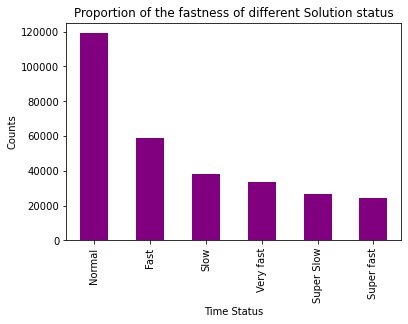

<Figure size 432x288 with 0 Axes>

In [193]:
RCTime['Solution Status'].value_counts().plot(kind='bar',color='purple')
plt.xlabel('Time Status')
plt.ylabel('Counts')
plt.title('Proportion of the fastness of different Solution status')
plt.show()
plt.tight_layout()

In [194]:
raw_data['Created Date'].head(5)

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]

In [196]:
Year_Month_Day = pd.to_datetime(raw_data['Created Date'].dt.date)
Month_Day = pd.DataFrame()
Month_Day['Date'] = pd.to_datetime(Year_Month_Day.dt.date)
Month_Day['Month'] = Year_Month_Day.dt.month
Month_Day['Day'] = Year_Month_Day.dt.day
Month_Day['Day No'] = Month_Day['Date'].dt.weekday
Month_Day['Day Name'] = Month_Day['Day No'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
                                                 5:'Saturday',6:'Sunday'})
Month_Day.sample(20)

Date  Month  Day  Day No   Day Name
2052   2015-12-29     12   29       1    Tuesday
202303 2015-06-28      6   28       6     Sunday
184340 2015-07-13      7   13       0     Monday
9991   2015-12-20     12   20       6     Sunday
124853 2015-09-05      9    5       5   Saturday
112057 2015-09-16      9   16       2  Wednesday
130398 2015-08-30      8   30       6     Sunday
227405 2015-06-07      6    7       6     Sunday
282382 2015-04-18      4   18       5   Saturday
140533 2015-08-22      8   22       5   Saturday
259809 2015-05-10      5   10       6     Sunday
106872 2015-09-20      9   20       6     Sunday
190382 2015-07-08      7    8       2  Wednesday
264246 2015-05-06      5    6       2  Wednesday
253219 2015-05-16      5   16       5   Saturday
71807  2015-10-22     10   22       3   Thursday
149433 2015-08-14      8   14       4     Friday
130227 2015-08-31      8   31       0     Monday
298534 2015-03-31      3   31       1    Tuesday
107486 2015-09-19      9   19       5   Saturday

In [205]:
Month_plot = Month_Day['Month'].value_counts()
Month_plot = Month_plot.to_frame()
Month_plot = Month_plot.rename(columns={'Month ':'Counts'})
Month_plot.rename(columns = {'Month':'monthly_counts'}, inplace = True)
Month_plot

monthly_counts
5            36437
9            35427
6            35315
8            34956
7            34888
10           32605
11           30773
12           30521
4            27305
3             2471

In [206]:
Day_plot = Month_Day['Day Name'].value_counts()
Day_plot = Day_plot.to_frame()
Day_plot = Day_plot.rename(columns={'Day Name':'Counts'})
Day_plot

Counts
Sunday      47969
Saturday    47564
Friday      43995
Thursday    41342
Monday      40489
Wednesday   39788
Tuesday     39551

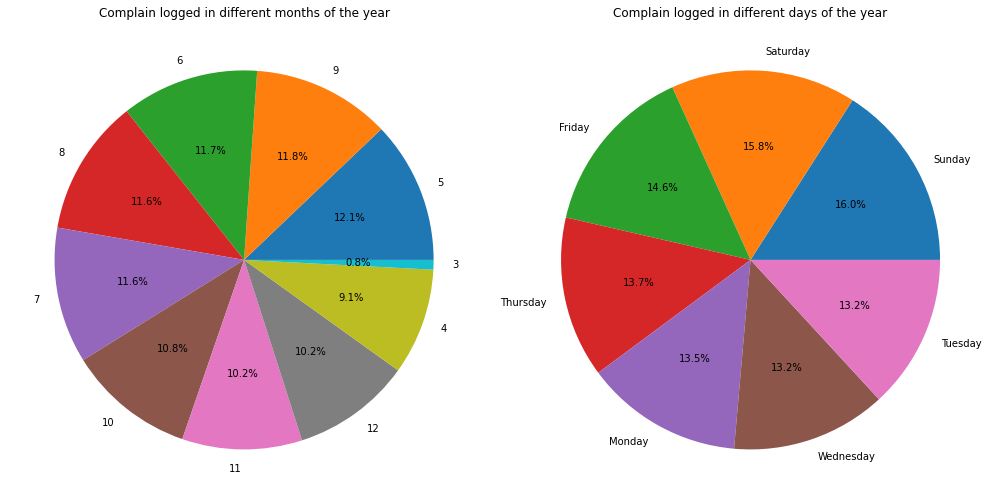

In [207]:
fig, axes = plt.subplots(1,2, figsize=(14,8))

axes[0].pie(Month_plot['monthly_counts'], labels = Month_plot.index,autopct='%1.1f%%')
axes[0].set_title('Complain logged in different months of the year')

axes[1].pie(Day_plot['Counts'], labels = Day_plot.index,autopct='%1.1f%%')
axes[1].set_title('Complain logged in different days of the year')

plt.tight_layout()

In [208]:
Month_Day_grouped = Month_Day.groupby(['Month','Day Name'],as_index=False)['Day No'].count()
Month_Day_grouped_final = Month_Day_grouped.rename(columns={'Day No':'Counts'})
Month_Day_grouped_final.head(5)

Month Day Name  Counts
0      3   Monday     807
1      3   Sunday     802
2      3  Tuesday     862
3      4   Friday    3565
4      4   Monday    3222

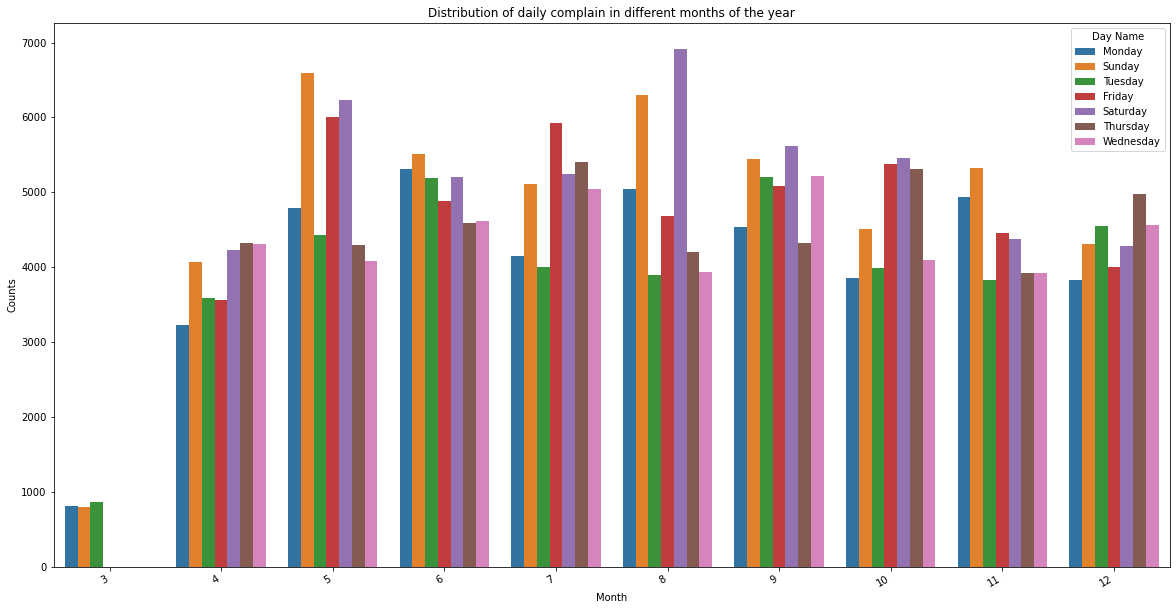

<Figure size 432x288 with 0 Axes>

In [209]:
plt.figure(figsize=(20,10))

month_day_plot = sns.barplot(x=Month_Day_grouped_final['Month'], y=Month_Day_grouped_final['Counts'], 
                             hue=Month_Day_grouped_final['Day Name'], data=Month_Day_grouped_final)
month_day_plot.set_xticklabels(month_day_plot.get_xticklabels(), rotation=30, ha="right")
plt.title('Distribution of daily complain in different months of the year')
plt.show()
plt.tight_layout()

### Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [212]:
Complaint_City_AvgTime_grouped = RCTime.groupby(['City','Complaint_Type']).agg({'DeltaT(in_hr.)':'mean'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.rename(
    columns={'DeltaT(in_hr.)':'Avg. Time(Given City, Complaint_Type)'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.transform('Avg. Time(Given City, Complaint_Type)')
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.to_frame()
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.sort_values(
    ['City','Avg. Time(Given City, Complaint_Type)'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Complaint_City_AvgTime_grouped.head(30)

Avg. Time(Given City, Complaint_Type)
City    Complaint_Type                                                  
ARVERNE Drinking                                                0.240000
        Vending                                                 0.480000
        Urinating in Public                                     0.690000
        Panhandling                                             1.030000
        Noise - Park                                            1.285000
        Graffiti                                                1.530000
        Noise - House of Worship                                1.562727
        Homeless Encampment                                     1.812500
        Noise - Vehicle                                         1.860000
        Noise - Street/Sidewalk                                 1.992759
        Animal Abuse                                            2.153158
        Noise - Commercial                                      2.285000
        Illegal Parking                                         2.316207
        Blocked Driveway                                        2.526286
        Derelict Vehicle                                        2.968519
        Disorderly Youth                                        3.595000
ASTORIA Panhandling                                             1.150000
        Bike/Roller/Skate Chronic                               1.740667
        Noise - House of Worship                                2.022632
        Illegal Fireworks                                       2.772500
        Disorderly Youth                                        2.903333
        Noise - Park                                            2.994754
        Noise - Commercial                                      3.133039
        Noise - Street/Sidewalk                                 3.450881
        Noise - Vehicle                                         3.509020
        Urinating in Public                                     4.626667
        Drinking                                                4.722571
        Blocked Driveway                                        4.816108
        Illegal Parking                                         4.833371
        Homeless Encampment                                     4.918750

# 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [218]:
import scipy.stats as stat

In [215]:
City_Complaint = pd.crosstab(raw_data['City'],raw_data['Complaint_Type'],margins=True, margins_name='Total')
City_Complaint.head(6)

Complaint_Type  Agency Issues  Animal Abuse  Animal in a Park  \
City                                                            
ARVERNE                     0            38                 0   
ASTORIA                     0           125                 0   
Astoria                     0             0                 0   
BAYSIDE                     0            37                 0   
BELLEROSE                   0             7                 0   
BREEZY POINT                0             2                 0   

Complaint_Type  Bike/Roller/Skate Chronic  Blocked Driveway  Derelict Vehicle  \
City                                                                            
ARVERNE                                 0                35                27   
ASTORIA                                15              2618               351   
Astoria                                 0               116                12   
BAYSIDE                                 0               377               198   
BELLEROSE                               1                95                89   
BREEZY POINT                            0                 3                 3   

Complaint_Type  Disorderly Youth  Drinking  Ferry Complaint  Graffiti  \
City                                                                    
ARVERNE                        2         1                0         1   
ASTORIA                        3        35                0         4   
Astoria                        0         0                0         0   
BAYSIDE                        1         1                0         3   
BELLEROSE                      2         1                0         0   
BREEZY POINT                   0         1                0         0   

Complaint_Type  Homeless Encampment  Illegal Fireworks  Illegal Parking  \
City                                                                      
ARVERNE                           4                  0               58   
ASTORIA                          32                  4             1068   
Astoria                           0                  0              213   
BAYSIDE                           2                  0              514   
BELLEROSE                         1                  1              106   
BREEZY POINT                      0                  0               15   

Complaint_Type  Noise - Commercial  Noise - House of Worship  Noise - Park  \
City                                                                         
ARVERNE                          2                        11             2   
ASTORIA                       1293                        19            61   
Astoria                        262                         0             0   
BAYSIDE                         40                         2             4   
BELLEROSE                       37                         1             1   
BREEZY POINT                     4                         0             0   

Complaint_Type  Noise - Street/Sidewalk  Noise - Vehicle  Panhandling  \
City                                                                    
ARVERNE                              29                7            1   
ASTORIA                             386              204            1   
Astoria                             114                0            0   
BAYSIDE                              15               16            0   
BELLEROSE                            13               10            1   
BREEZY POINT                          1                1            0   

Complaint_Type  Posting Advertisement  Squeegee  Traffic  Urinating in Public  \
City                                                                            
ARVERNE                             0         0        0                    1   
ASTORIA                             1         0       47                    9   
Astoria                             0         0        0                    0   
BAYSIDE                      

In [219]:
chai2, p_val, df, exp_frq = stat.chi2_contingency(City_Complaint)

In [220]:
print('Chai square value =',chai2)
print('p-value is =',p_val)

Chai square value = 120119.11282606117
p-value is = 0.0


In [221]:
if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

Null hypothesis is rejected since p value (0.0) is less than 0.05
